https://www.youtube.com/watch?v=vo6gQz5lYRI&t=2016s

## What is Feature Extraction from text?
ML Algos can only understand numbers and the conversion of text to numbers is called Feature Extration from Text or Text Vectorization

------------------------------------------------
## Why do we need it?
ML algos require good features (data) to perform well.

-------------------------------------------------
## Why is it difficult?
It is very difficult to represent text in numbers.
- it is easy to convert Pictures to numbers as pictures are made of pixels which can easily be represented in Numbers
- it is easy to understand the whether a person is angry, neutral or happy from speech as we can use the waves (amplitude, etc) features of audio clip to understand this.
But in case of textual data, there is no direct representation. A word have different contextual meanings.

-------------------------------------------------
## What is the core idea/ role/ north start?
When we perform feature extraction from text, it should be able to convey the semantic (hidden) meaning of the text in numbers. The better we are able to this, better will be result.

i.e. convert Text meaning into numbers

-----------------------------------------------
## What are the techniques?
1. One Hot Encoding
2. Bag of Words
3. N grams
4. TFIDF
5. Custom features
6. Word2Vec (Embeddings) -- Deep Learning Technique



#### Corpus
Collection of all the texts i.e. if in a movie review datasets, when we combine all the words of the reviews, we get corpus. i.e. combination of all the words of a dataset

-----------------------------------------------------------------------
#### Vocabulary
All the unique words from which corpus is made of 

---------------------------------------------------------------------
#### Document
Each review of movie review dataset is called document. i.e. each row of the dataset which contains the text

-----------------------------------------------------------------
#### Word
Each word of a document is called Word

## 1. One Hot Encoding

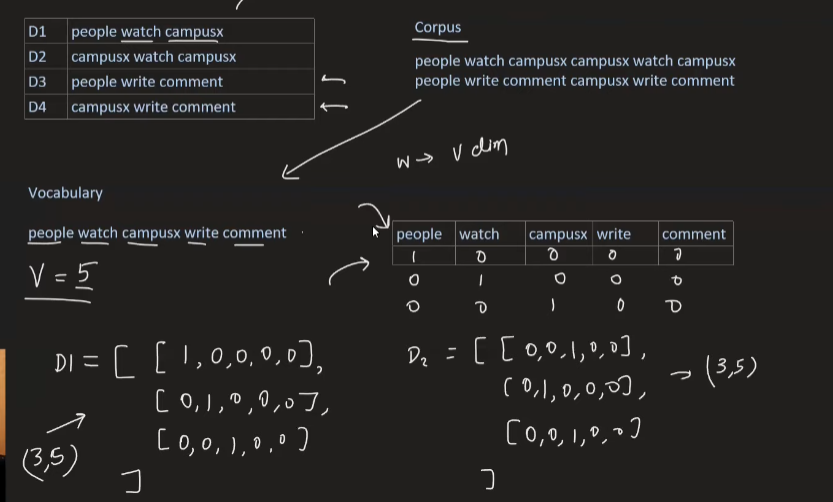

-------------------------------------------------------------------------------------------
Advantages: very intuitive


---------------------------------------------------------------------------------------------
Disadvantages: There are lots of flaws and hence it is not used
1. Suppose the vocabulory has 50,000 words, to represent a single word, we will need 50,000 numbers where 1 number will 1 and others 0. This is will create a sparse array and in ML sparse arrays cause overfitting.
2. Suppose if the number of words in each document is different, then the vector representing a sentence will be of different size. ML algos need fixed size data and hence ML algos will not be able to train.
3. After training model, if we get word which was not present in vocabulary, then how to represent the word? We will not be able to convert the word into number, hence no prediction --> also known as Out of Vocabulory (OOV)
4. Does not capture Sematic meaning

i.e.
1. Sparcity
2. No fixed size
3. Out of Vocabulory (OOV)
4. Does not capture Sematic meaning

## 2. Bag of Words
It has been proved through research that in text classification, Bag of Words gives amazing results

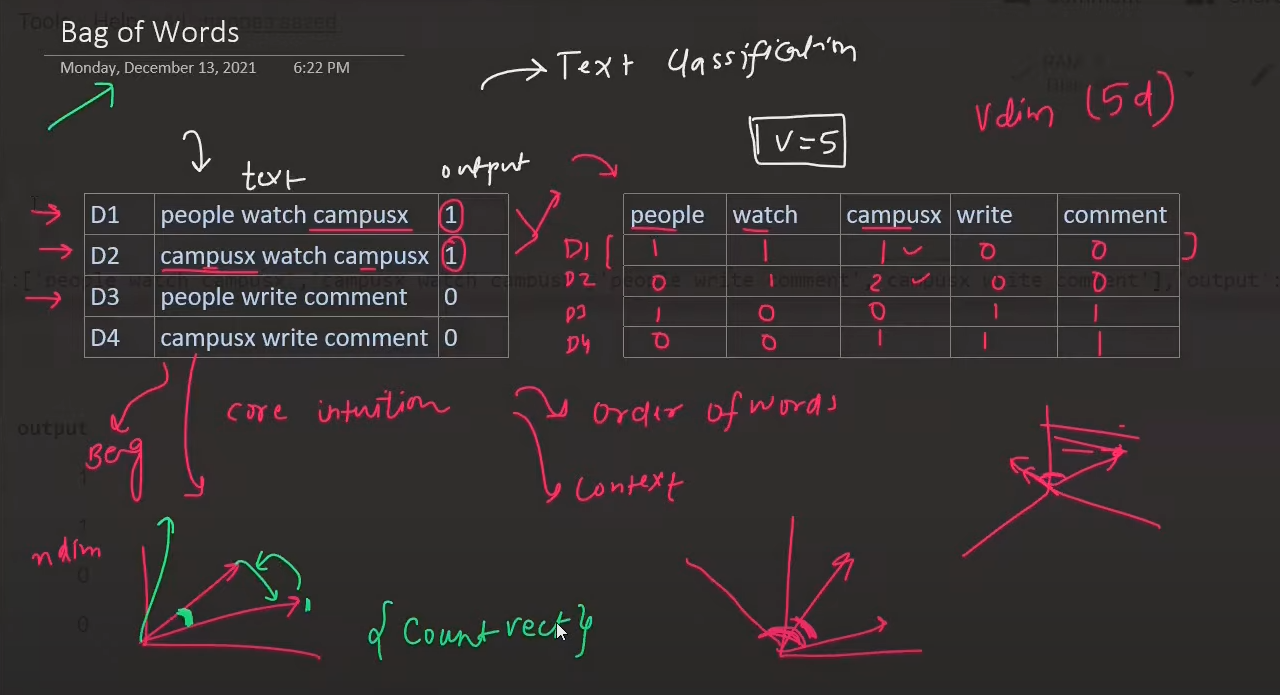

------------------------------------------------------------------------------------------------------

##### Core Intution: In same labels (class) of documents, same words will occur at same frequency.
- What matters is that the word is there and what is the frequency
- Order of the words does not matter
- Context (Sematic) of the sentence does not matter

But the semantic meaning is captured. The reason is when we create a vector for the sentence in the n-dimentional space, the similarity/dissimilarity between the sentences are captured via the angle between the document vectors.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({
    'text': ['people watch youtube', 'youtube watch youtube', 'people write comment', 'youtube write comment'],
    'output': [1,1,0,1]
})

df

,text,output
0,people watch youtube,1
1,youtube watch youtube,1
2,people write comment,0
3,youtube write comment,1


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [4]:
bag_of_words = cv.fit_transform(df['text'])

# vocab with index position
print(cv.vocabulary_)

{'people': 1, 'watch': 2, 'youtube': 4, 'write': 3, 'comment': 0}


In [5]:
# Converting to Vector
print(bag_of_words[0].toarray())
print(bag_of_words[1].toarray())

[[0 1 1 0 1]]
[[0 0 1 0 2]]


In [7]:
# new sentence for prediction

cv.transform(['youtube watch and write comment of youtube']).toarray()

array([[1, 0, 1, 1, 2]], dtype=int64)

here the Out of Vocabulary problem of OHE is handled as 'and' and 'of' were not present during training time. In Bag of Words, we need not care about words which are out of vocabulory, since we are as per algorithm looking only for the frequency of words from the vocabulory in the document.
- Although 'and' and 'of' are stop words and hence most probably they will be removed in pre processing steps

-----------------------------------------------------------------------------
##### Important parameters for the below class

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

1. binary --> by default it is false, but when made True, it will check for existence of the word and not the frequency. In sentiment analysis, it has been proven that binary=True gives better result

2. max_features --> by default it is None. But when we give a number as n, then it takes the top n frquently occuring words. This is mostly used for removing rare words.

#### Advantages of Bag of Words
1. Clear and Intutive
2. Solve the issue of No Fixed Size issue of One Hot Encoding, since the putput vector size is always same.
3. Out of Vocabulory issue is also used since our algorithm ask --> What is the frequency of vocabulary words in the document/sentence
4. Better in capturing semntic relationships as compared to OHE, but not that much

------------------------------------------------------------------------------
#### Disadvantages of Bag of Words
1. Sparcity -- same as OHE --> this causes overfitting
2. We ignore words which are not present in Vocabulory (i.e. Out of Vocabulory problem is still there, its just that no error will come if OOV words comes). Hence we loose the information which can be gained if we had utilized/used the OOV word occuring in the document
3. When we write English, we write left to right, i.e. there is ordering of words. Change in order changes the meaning of sentence in any language and it is very important factor to convey meaning. When we use Bag of Words, we do not focus on ordering. Therefore, some Deep Learning techniques perform better as they try to understand the ordering like RNN, LSTM, etc.
4. Take 2 sentences
    - This is a good movie.
    - This is not a good movie.
    
    As per Bag of words, the vectors of these two sentences are very similar, hence the angle between them is very small. But both the sentences convey opposite meanings. Thus, when due to small changes, there is a very big change, Bag Of Words fails, and here the next technique handles it well --> N-grams.

## 3. N-grams

In Bag of Words we formed, our vocabulory was made up of single words. Due to this the ordering of words in sentence did not have meaning for Bag of Words algorithm. N-grams solves this issue.

-------------------------------------------------------------
##### Bi-gram
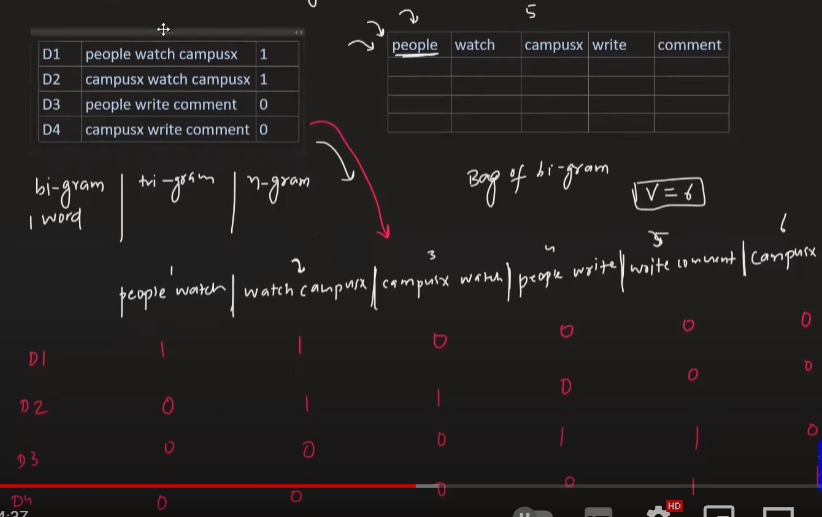

-------------------------------------------------------------

##### We can say that Bag of Words is a special case of Bag of N-grams where N-gram is Uni-gram

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

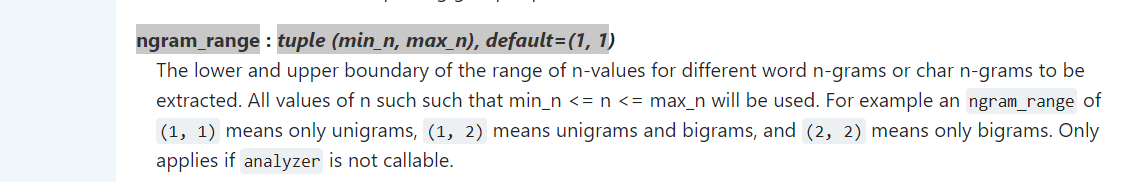



In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))

n_grams = cv.fit_transform(df['text'])

# vocab with index position
print("Vocabulory is: ", cv.vocabulary_)

print(n_grams[0].toarray())
print(n_grams[1].toarray())

# new sentence for prediction
cv.transform(['youtube watch and write comment of youtube']).toarray()

Vocabulory is:  {'people watch': 0, 'watch youtube': 2, 'youtube watch': 4, 'people write': 1, 'write comment': 3, 'youtube write': 5}
[[1 0 1 0 0 0]]
[[0 0 1 0 1 0]]


array([[0, 0, 0, 1, 1, 0]], dtype=int64)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,2))

n_grams = cv.fit_transform(df['text'])

# vocab with index position
print("Vocabulory is: ", cv.vocabulary_)

print(n_grams[0].toarray())
print(n_grams[1].toarray())

# new sentence for prediction
cv.transform(['youtube watch and write comment of youtube']).toarray()

Vocabulory is:  {'people': 1, 'watch': 4, 'youtube': 8, 'people watch': 2, 'watch youtube': 5, 'youtube watch': 9, 'write': 6, 'comment': 0, 'people write': 3, 'write comment': 7, 'youtube write': 10}
[[0 1 1 0 1 1 0 0 1 0 0]]
[[0 0 0 0 1 1 0 0 2 1 0]]


array([[1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0]], dtype=int64)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(3,3))

n_grams = cv.fit_transform(df['text'])

# vocab with index position
print("Vocabulory is: ", cv.vocabulary_)

print(n_grams[0].toarray())
print(n_grams[1].toarray())

# new sentence for prediction
cv.transform(['youtube watch and write comment of youtube']).toarray()

Vocabulory is:  {'people watch youtube': 0, 'youtube watch youtube': 2, 'people write comment': 1, 'youtube write comment': 3}
[[1 0 0 0]]
[[0 0 1 0]]


array([[0, 0, 0, 0]], dtype=int64)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,3))

n_grams = cv.fit_transform(df['text'])

# vocab with index position
print("Vocabulory is: ", cv.vocabulary_)

print(n_grams[0].toarray())
print(n_grams[1].toarray())

# new sentence for prediction
cv.transform(['youtube watch and write comment of youtube']).toarray()

Vocabulory is:  {'people': 1, 'watch': 6, 'youtube': 10, 'people watch': 2, 'watch youtube': 7, 'people watch youtube': 3, 'youtube watch': 11, 'youtube watch youtube': 12, 'write': 8, 'comment': 0, 'people write': 4, 'write comment': 9, 'people write comment': 5, 'youtube write': 13, 'youtube write comment': 14}
[[0 1 1 1 0 0 1 1 0 0 1 0 0 0 0]]
[[0 0 0 0 0 0 1 1 0 0 2 1 1 0 0]]


array([[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0]], dtype=int64)

Take 2 sentences
    - This is very good movie.
    - This is not very good movie.
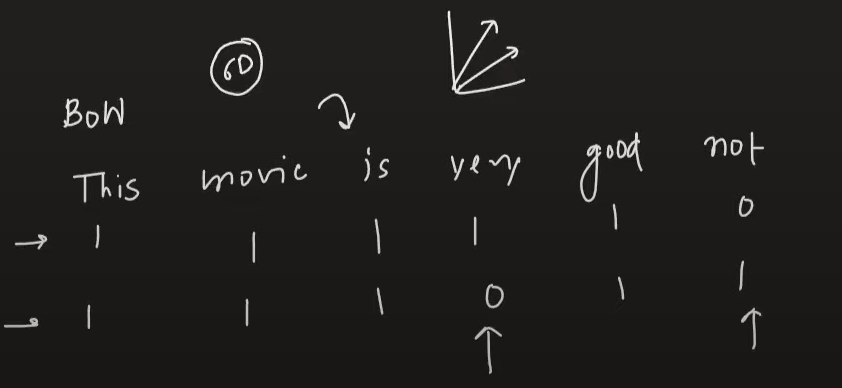

In 6-D vector, only 2 are different

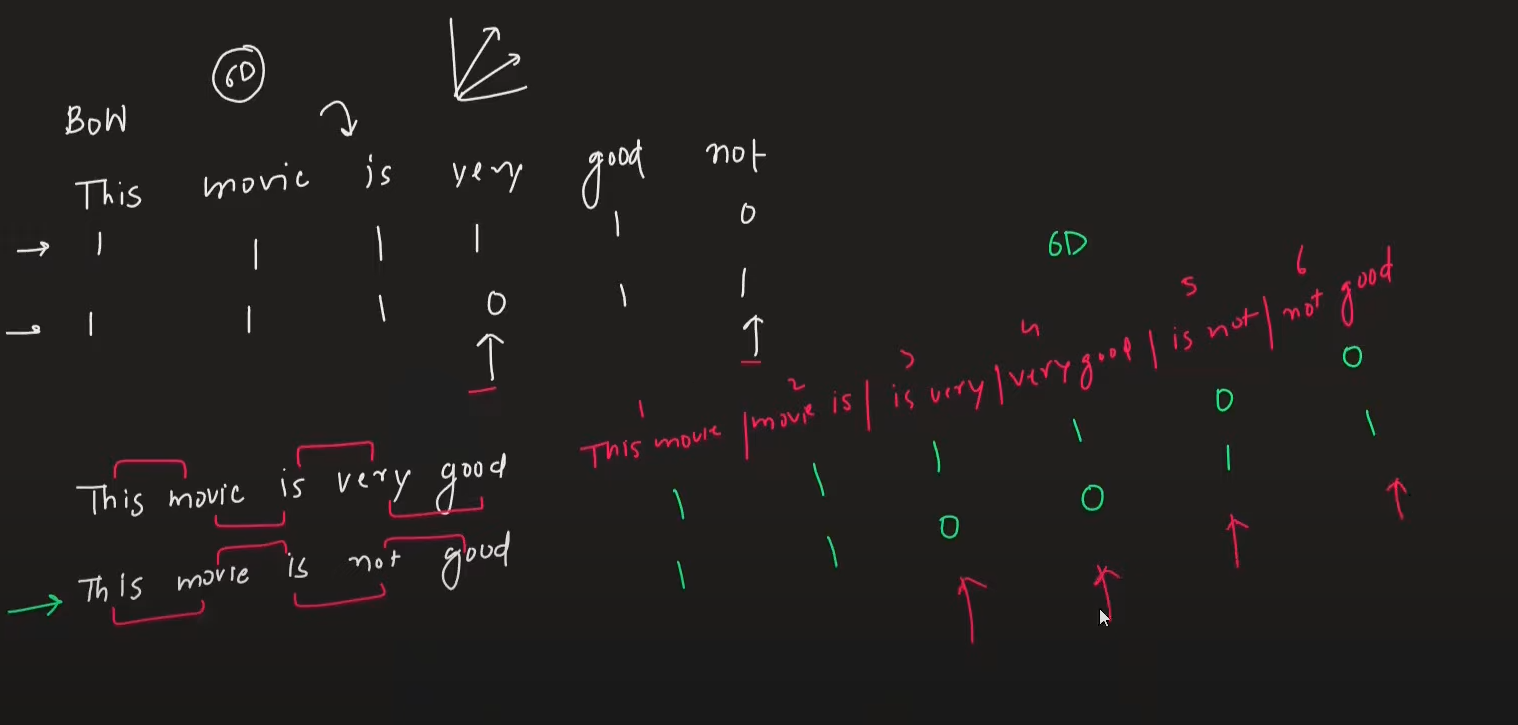

In 6-D vector, 4 are different

-------------------------------------------------------
#### Advantages of N-gram
1. Captures sematic meaning
2. Intuitive

------------------------------------------------------
#### Disadvantages of N-gram
1. For huge dataset, dimesionality of vocabulory increases, hence time complexity increases as we increase N value
2. No solution for Out of Vocabulory issue, just that error will be handled.



## 4. Tf-Idf 
In all the previous techniques, the weightage of each of the word is same. Tf-Idf does not do this. It will assign different words different values

--------------------------------------------------------
##### Logic: 
If a word is very frequent is a particular document but rare in the corpus, then that word will have higher score than other words, since it means that the value of that word is higher for that particular document than other words. To calculate this value, 2 terms are calculated and then multipled.
1. Term Frequency (TF)
2. Inverse Document Frequency (Idf) : tells how rare is the term in document. If a term occurs in all document, then IDF will be 0. i.e. higher the term frequent in corpus (with respect to documents), lower the IDF and vice-versa

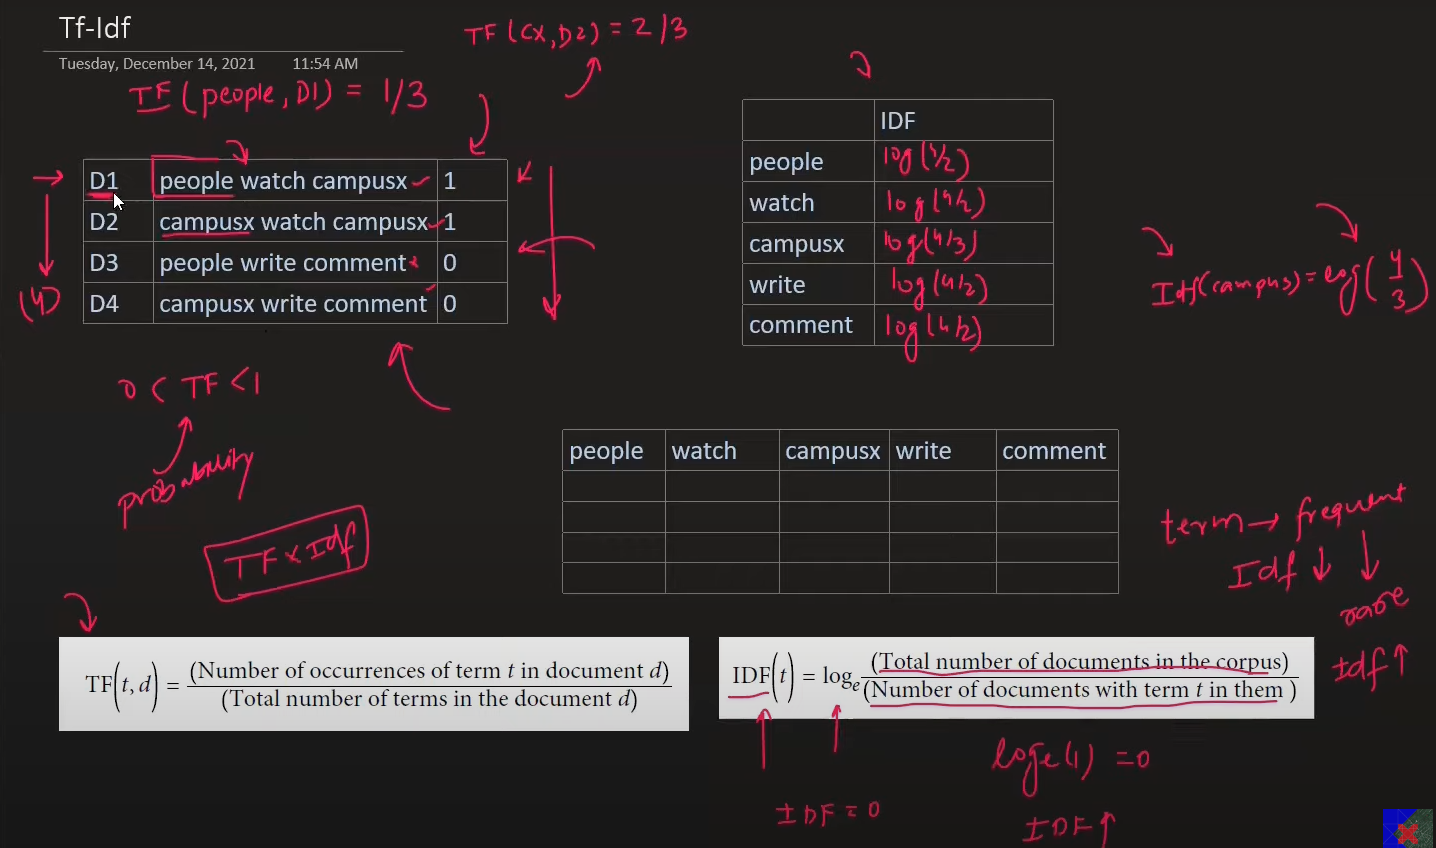

Vector Form

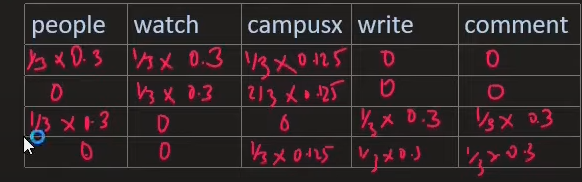

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray()  # since this returns sparse matrix, to convert to numpy array, we explicitly use toarray()

array([[0.        , 0.61366674, 0.61366674, 0.        , 0.49681612],
       [0.        , 0.        , 0.52546357, 0.        , 0.8508161 ],
       [0.57735027, 0.57735027, 0.        , 0.57735027, 0.        ],
       [0.61366674, 0.        , 0.        , 0.61366674, 0.49681612]])

In [21]:
print('IDF values', tfidf.idf_)
print('Vocabulary: ', tfidf.get_feature_names_out())

IDF values [1.51082562 1.51082562 1.51082562 1.51082562 1.22314355]
Vocabulary:  ['comment' 'people' 'watch' 'write' 'youtube']


In sklearn TfidfVectorizer implementation, 1 is added. So, we see higher IDF values in above code.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

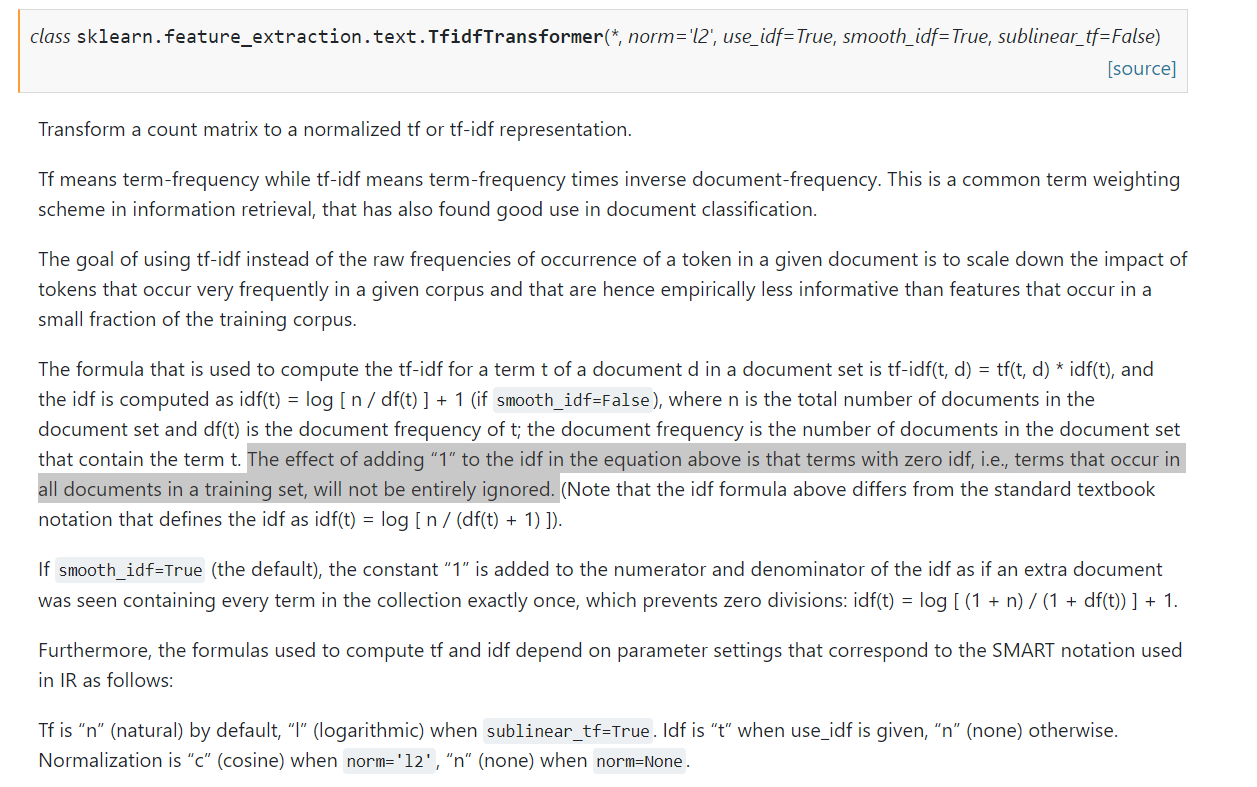


##### Why we take log while calculating IDF and not for TF? (Interview Question)
If we use IDF = (N/n), then for terms like encyclopedia which are very less, IDF value will be very high. By taking log, we smoothen/normalise this steep increase.
- The value of TF will be from 0 to 1 as it is basically probability. Hence when IDF value is vary large, IDF will dominate TF, but we want both
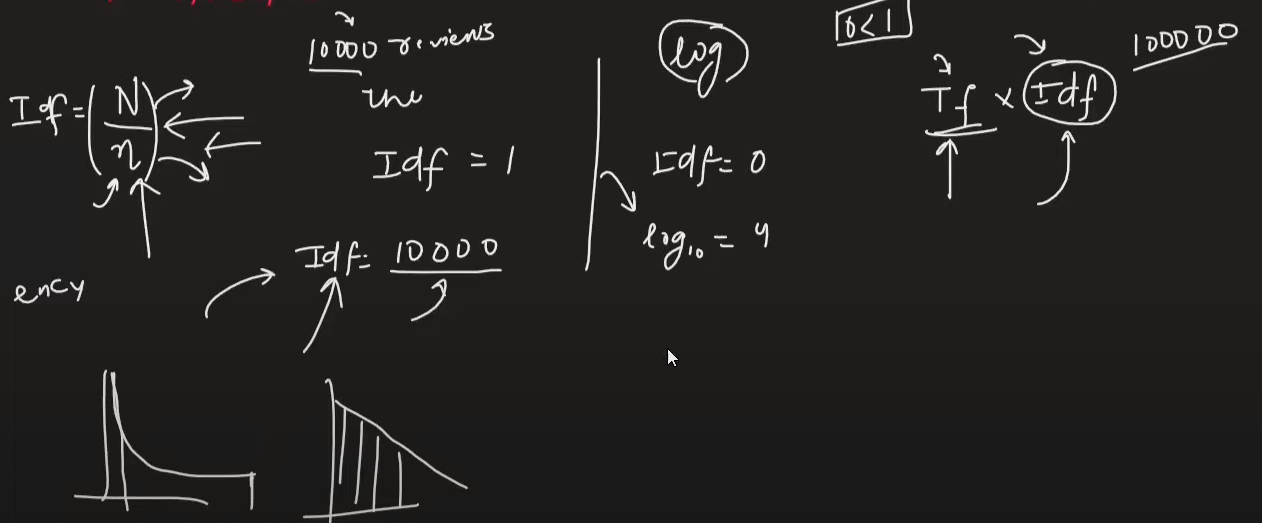

--------------------------------------------------------------------
TF tells  how important is a particular term in the document
IDF tells how important is a particular term for the entire corpus

#### Advantages of TfIdf
1. Very useful in Information Retrieval Systems such as Google Search Engine


------------------------------------------------------------------
#### Disadvantages
1. Sparsity --> If vocabulary is huge, we will get sparse array --> overfitting
2. Out of Vocabulary issue
3. High Vocabulary means high dimension array ---> time complexity
4. Semantic relationship is not captured properly
    - (1) This is beautiful. (2) This is georgeous.
    - It will treat beautiful and georgeous as two different terms, but they mean the same

## 5. Custom Features (Hand Crafted features)
We make them based on domain knowledge to get better results. This is generally used in with the technical features in NLP models.

Examples:
1. Word count
2. Positive words in review
3. Negative words in review
4. Ratio of positive and negative words

# Assingment

Use the following dataset - https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [22]:
# Problem 1

# Apply all the preprocessing techniques that you think are necessary

In [23]:
# Problem 2

# Find out the number of words in the entire corpus and also the total number of unique words(vocabulary) using just python

In [24]:
# Problem 3

# Apply One Hot Encoding

In [25]:
# Problem 4

# Apply bag words and find the vocabulary also find the times each word has occured

In [26]:
# Problem 5

# Apply bag of bi-gram and bag of tri-gram and write down your observation about the dimensionality of the vocabulary

In [27]:
# Problem 6

# Apply tf-idf and find out the idf scores of words, also find out the vocabulary.